In [2]:
import numpy as np
from scipy.signal import triang
from scipy.fftpack import fft

In [3]:
x = triang(15)
X = fft(x)
mX = abs(X)
pX = np.angle(x)

In [4]:
%matplotlib inline

In [5]:
from matplotlib.pyplot import plot

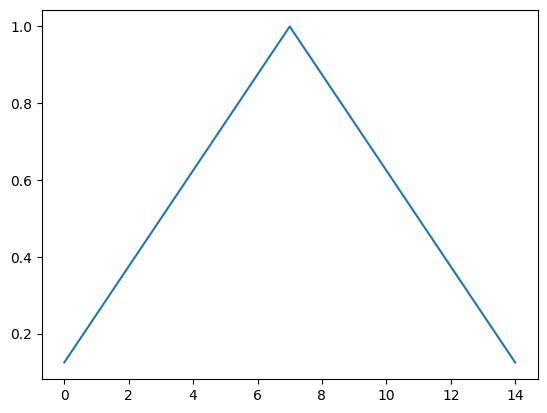

In [6]:
plot(x)

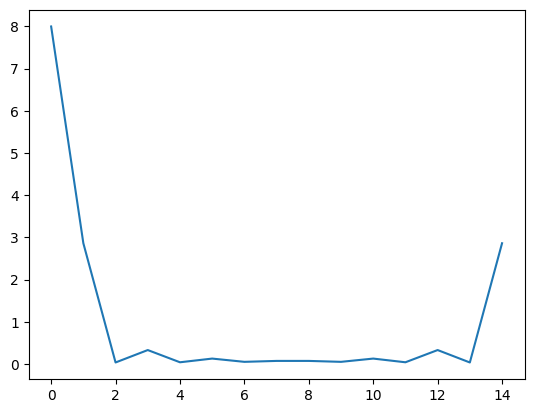

In [7]:
plot(mX)

In [8]:
print(x)
print(X)

[0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    0.875 0.75  0.625 0.5
 0.375 0.25  0.125]
[ 8.00000000e+00-0.j         -2.79759784e+00-0.59464778j
  2.98381159e-02+0.01328479j -2.64754249e-01-0.19235522j
  2.50553568e-02+0.02782679j -6.25000000e-02-0.10825318j
  1.47542486e-02+0.04540891j -7.29562994e-03-0.06941328j
 -7.29562994e-03+0.06941328j  1.47542486e-02-0.04540891j
 -6.25000000e-02+0.10825318j  2.50553568e-02-0.02782679j
 -2.64754249e-01+0.19235522j  2.98381159e-02-0.01328479j
 -2.79759784e+00+0.59464778j]


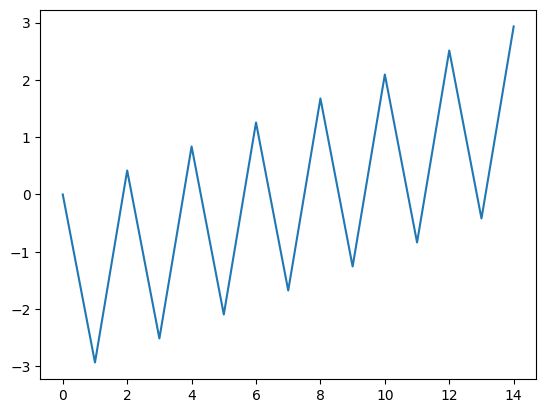

In [10]:
# plot the phase spectrum pX
pX = np.angle(X)
plot(pX)

# Phase shift - by adding buffer

x = triang(15)
# add buffer
fftbuffer = np.zeros(15)
fftbuffer[:8] = x[7:] # move 2nd half of x to 1st half of the buffer
fftbuffer[8:] = x[:7] # move 1st half of x to 2nd half of the buffer
# now calculate the FFT 
X = fft(fftbuffer)
mX = abs(X)
pX = np.angle(X)

In [11]:
x = triang(15)
# add buffer
fftbuffer = np.zeros(15)
fftbuffer[:8] = x[7:] # move first half of x to last half of the buffer
fftbuffer[8:] = x[:7] # move last half of x to first half of the buffer
# now calculate the FFT 
X = fft(fftbuffer)
mX = abs(X)
pX = np.angle(X)

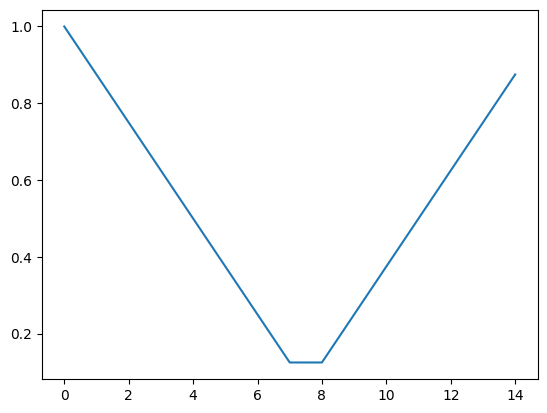

In [15]:
# plot the buffer
plot(fftbuffer) # --> its symmetrical around 0

/Users/atul/miniconda3/envs/PY39/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


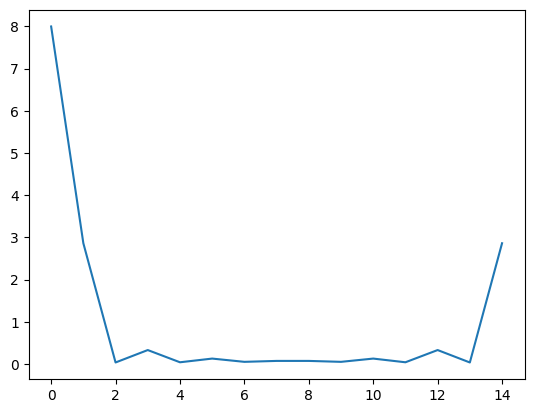

In [16]:
plot(X)

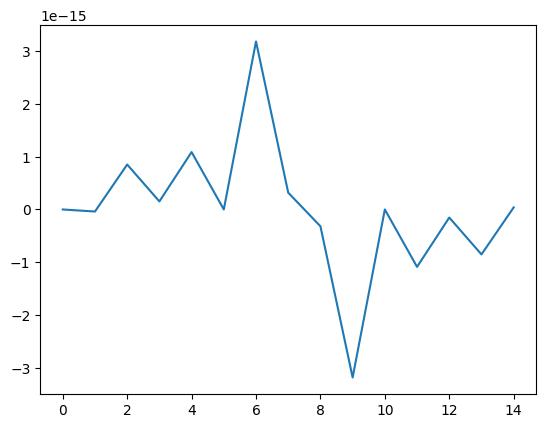

In [17]:
plot(pX) # --> the y-axis is almost 0

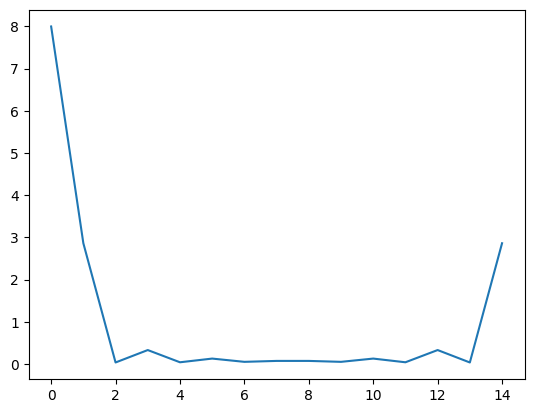

In [18]:
plot(mX)

# Now lets do a real signal
From our collection


In [19]:
import sys
import os
import math 


In [20]:
sys.path.append(os.path.join(os.path.dirname(os.path.realpath(__file__)), '../software/models/'))

NameError: name '__file__' is not defined

In [21]:
print(sys.path)

['/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace', '/Users/atul/miniconda3/envs/PY39/lib/python39.zip', '/Users/atul/miniconda3/envs/PY39/lib/python3.9', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/lib-dynload', '', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/site-packages']


In [22]:
os.getcwd()

'/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace'

In [23]:
os.path.join(os.getcwd(), '../software/models/')

'/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace/../software/models/'

In [24]:
sys.path.append(os.path.join(os.getcwd(), '../software/models/'))

In [25]:
print(sys.path)

['/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace', '/Users/atul/miniconda3/envs/PY39/lib/python39.zip', '/Users/atul/miniconda3/envs/PY39/lib/python3.9', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/lib-dynload', '', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/site-packages', '/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace/../software/models/']


In [26]:
import utilFunctions as UF

In [27]:
## Lets define a small window - of 501 samples
M = 501
hM1 = int(math.floor((M+1)/2))
hM2 = int(math.floor(M/2))
print(f"M {M}, hM1 {hM1}, hM2 {hM2}")

M 501, hM1 251, hM2 250


In [28]:
# read a signal
SOUND = '../sounds/soprano-E4.wav'
fs, x = UF.wavread(SOUND)

In [29]:
x1 = x[5000:5000+M] * np.hamming(M) # take a small sample using hamming window

In [30]:
N = 511
# center that set of 501-sized window around 0
fftbuffer = np.zeros(N) # create a buffer
fftbuffer[:hM1] = x1[hM2:]  # insert it inside our signal 
fftbuffer[N - hM2: ] = x1[:hM2]

In [31]:
# run the FFt
X = fft(fftbuffer)
mX = abs(X)
pX = np.angle(X)

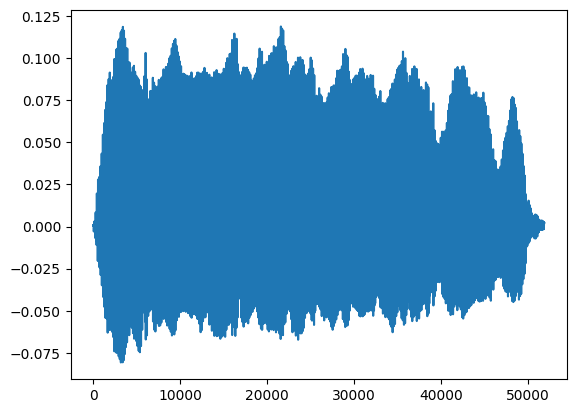

In [32]:
# plot the original sound
plot(x)

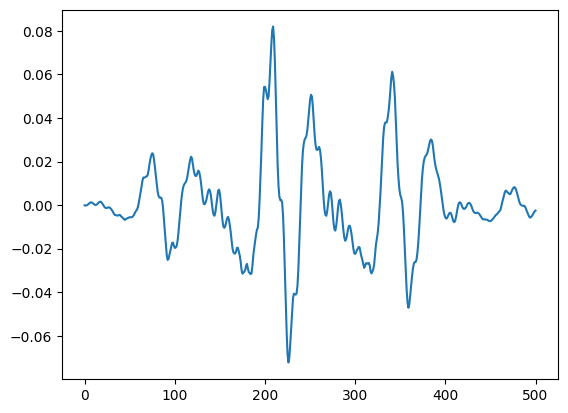

In [33]:
# plot the window of M samples
plot(x1)

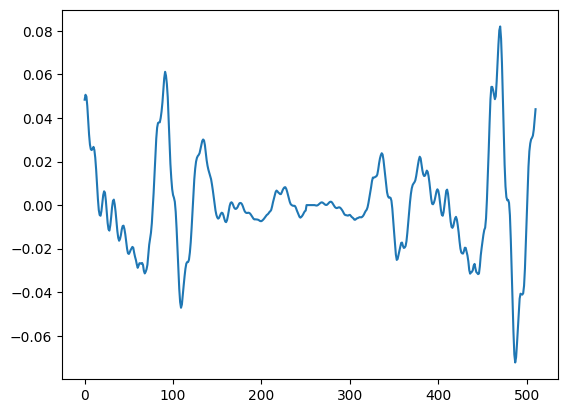

In [34]:
# plot the FFTbuffer - which is centered around 0
plot(fftbuffer)

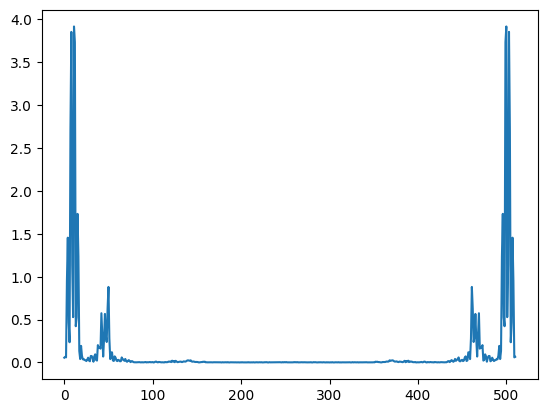

In [35]:
# plot the magnitude spectrum of the FFT Buffer --> shows the symmetry
plot(mX)

Positive sample are shown in the first half, negative are shown in the latter half

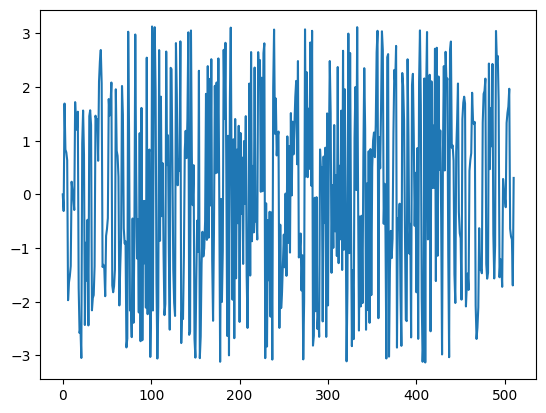

In [36]:
# plot the phase
plot(pX) # --> anti-symmetric 

### Now lets try an FFT of size N power of 2, e.g. 1024
N is independent of the size of samples (M)

In [37]:
N = 1024
# center that set of 501-sized window around 0
fftbuffer = np.zeros(N) # create a buffer
fftbuffer[:hM1] = x1[hM2:]  # insert it inside our signal 
fftbuffer[N - hM2: ] = x1[:hM2]

In [38]:
# run the FFT on the buffer which is zeropadded 
X = fft(fftbuffer)
mX = abs(X)
pX = np.angle(X)

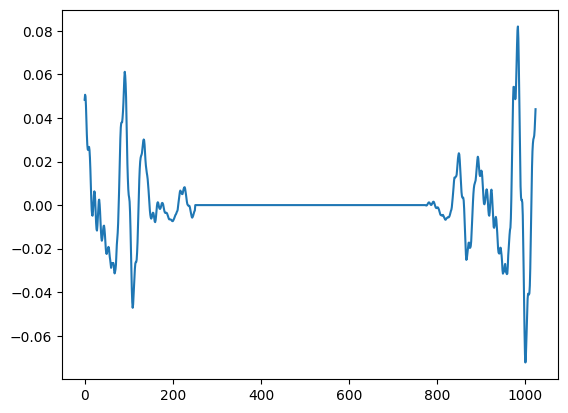

In [39]:
# plot the fftbuffer --> should be 1024 samples, with zero padding in the middle
plot(fftbuffer)

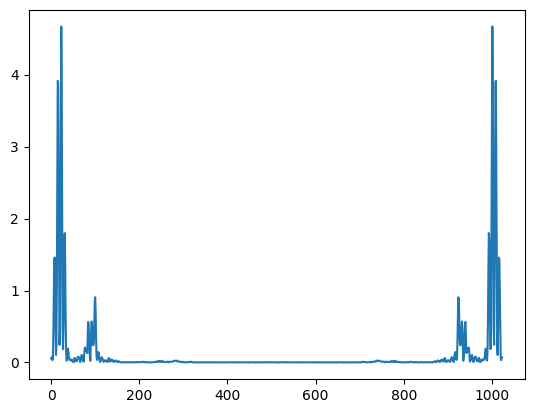

In [40]:
# mag
plot(mX)

In [41]:
# get the mag in dB instead
mX = 20 * np.log10(abs(X))

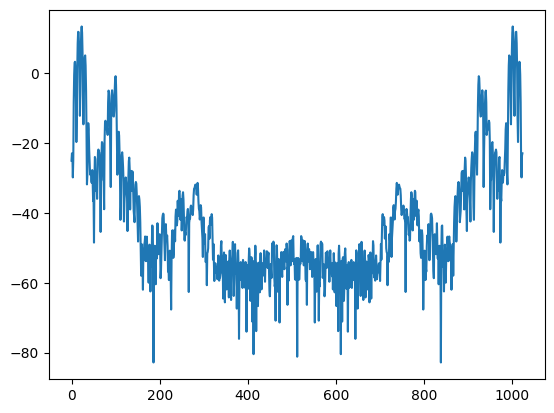

In [44]:
# plot the mag in dB
plot(mX)

In [50]:
half_len = int( len(mX) / 2 )
print(half_len)

512


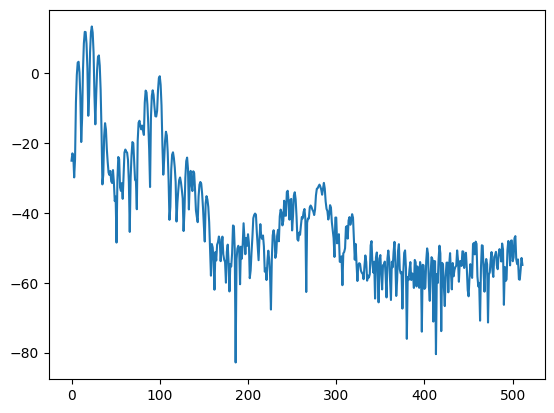

In [51]:
plot(mX[0:half_len])

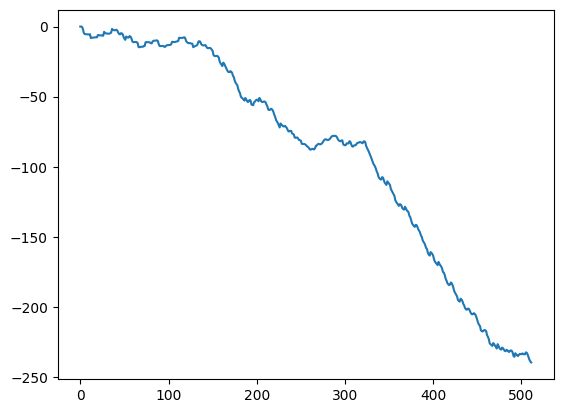

In [53]:
## similarly, for phase, we want to unwrap the angles, and show only the first half
pX = np.unwrap(np.angle(X))
plot(pX[0:half_len])